## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

-Павлосюк Роман
-Гринда Юліана

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм LZW

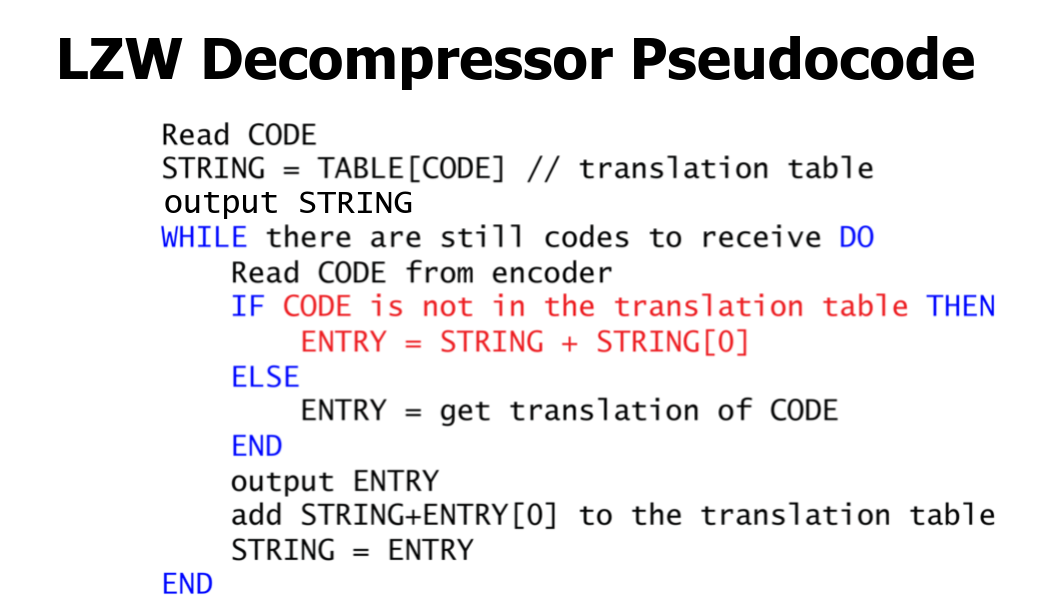

In [7]:
class LZW:
    def encode(self, text:str) -> tuple[str, list]:
        output = []
        w = ''
        start_dictionary = {}
        counter = 0
        for letter in text:
            if letter not in start_dictionary:
                start_dictionary[letter] = counter
                counter += 1
        new_dictionary = start_dictionary.copy()
        for letter in text:
            if w + letter in new_dictionary:
                w += letter
            else:
                new_dictionary.update({w + letter: max(new_dictionary.values())+1})
                output.append(new_dictionary[w])
                w = letter
        output.append(new_dictionary[w])
        return output, list(start_dictionary.keys()), start_dictionary

    def decode(self, code: list, coding_dict: list) -> str:
        coding_dict = {i:el for i,el in enumerate(coding_dict)}
        string = coding_dict[code[0]]
        output = ''
        output += string
        counter = max(coding_dict.keys()) + 1
        for i in range(len(code)-1):
            new = code[i + 1]
            if new not in coding_dict:
                entry = string + string[0]
            else:
                entry = coding_dict[new]
            output += entry
            coding_dict[counter] = string + entry[0]
            counter += 1
            string = entry
        return output

In [11]:

encoding = LZW().encode("TOBEORNOTTOBEORTOBEORNOT")
print(encoding)
print(LZW().decode(encoding[0], encoding[1]))

([0, 1, 2, 3, 1, 4, 5, 1, 0, 6, 8, 10, 15, 9, 11, 13], ['T', 'O', 'B', 'E', 'R', 'N'], {'T': 0, 'O': 1, 'B': 2, 'E': 3, 'R': 4, 'N': 5})
TOBEORNOTTOBEORTOBEORNOT


In [8]:
import time
from tqdm import tqdm

lzw = LZW()

text_message = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod \
tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud \
exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor \
in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint \
occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

num_of_iterations = 1000

time_taken_encoding = 0
time_taken_decoding = 0

for _ in tqdm(range(num_of_iterations)):

    start = time.time()

    encoding = lzw.encode(text_message)

    end = time.time()

    time_taken_encoding += end - start

    start = time.time()

    lzw.decode(encoding[0], encoding[1])
print(encoding)
print(f"Average time to compress message is: {round(time_taken_encoding * 1000, 3)} miliseconds or {round(time_taken_encoding, 3)} seconds")
print(f"Average time to compress message is: {round(time_taken_decoding * 1000, 3)} miliseconds or {round(time_taken_decoding, 3)} seconds")

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 1029.57it/s]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 32, 10, 1, 11, 29, 5, 8, 6, 12, 5, 13, 4, 3, 12, 14, 5, 15, 1, 16, 8, 3, 15, 12, 50, 9, 2, 47, 10, 34, 6, 8, 15, 6, 16, 17, 5, 3, 11, 45, 52, 57, 10, 5, 39, 73, 6, 9, 8, 4, 1, 79, 60, 4, 7, 42, 70, 69, 65, 10, 9, 16, 46, 9, 46, 11, 13, 18, 29, 3, 73, 46, 39, 41, 30, 5, 4, 13, 17, 16, 13, 47, 75, 19, 9, 13, 20, 5, 21, 46, 3, 16, 6, 32, 13, 79, 4, 70, 129, 5, 22, 127, 6, 48, 52, 120, 67, 5, 16, 1, 8, 12, 2, 9, 79, 3, 23, 3, 2, 69, 12, 13, 12, 6, 55, 5, 9, 11, 102, 4, 54, 5, 102, 104, 2, 143, 128, 44, 162, 46, 13, 119, 9, 34, 73, 23, 73, 117, 54, 4, 86, 81, 54, 56, 3, 120, 158, 123, 24, 179, 8, 47, 100, 106, 6, 149, 111, 109, 92, 16, 5, 30, 7, 30, 25, 127, 10, 154, 45, 33, 206, 22, 40, 9, 7, 157, 60, 136, 74, 215, 3, 8, 57, 53, 6, 164, 37, 80, 40, 105, 73, 9, 5, 26, 9, 17, 139, 46, 16, 163, 102, 5, 7, 13, 171, 158, 62, 123, 27, 23, 15, 3, 221, 3, 62, 43, 70, 46, 1, 15, 15, 13, 58, 158, 53, 220, 6, 10, 158, 270, 145, 206, 209, 1, 273, 127, 51, 43, 97, 46, 70